In [1]:
import pandas as pd #Veri setlerini okuma, yazma, filtreleme, birleştirme ve diğer birçok işlemi gerçekleştirmek için kullanılır.
from sklearn.model_selection import train_test_split #Makine öğrenimi modellerinin eğitim ve değerlendirme için veriyi bölme, çapraz doğrulama gibi işlemleri gerçekleştirmek için kullanılır
import matplotlib.pyplot as plt  # Grafik oluşturma kütüphanesi
import seaborn as sns # Python veri görselleştirme kütüphanesi
import numpy as np  #Sayısal hesaplamalar için kullanılan temel bir kütüphanedir.
import csv  #CSV dosyalarıyla çalışmak için standart kütüphane
from sklearn.metrics import roc_curve, auc  #Makine öğrenimi modeli performansını değerlendirmek için kullanılan metriklerin bulunduğu kütüphane
from sklearn.linear_model import LogisticRegression  
from sklearn.impute import SimpleImputer  #Eksik değerlerin doldurulması için kullanılan kütüphane
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
# data.csv dosyasını okuyarak data adlı değişkene atar
data = pd.read_csv("data.csv")  

In [3]:
# Veri çerçevesinden 'Gate_location' sütununu kaldır.
# axis=1 sütunu belirtir, inplace=True veri çerçevesini doğrudan günceller.
data.drop('Gate_location', axis=1, inplace=True)

# Veri çerçevesinden 'Online_boarding' sütununu kaldır.
# axis=1 sütunu belirtir, inplace=True veri çerçevesini doğrudan günceller.
data.drop('Online_boarding', axis=1, inplace=True)

# Veri çerçevesinden 'Inflight_entertainment' sütununu kaldır.
# axis=1 sütunu belirtir, inplace=True veri çerçevesini doğrudan günceller.
data.drop('Inflight_entertainment', axis=1, inplace=True)

# Veri çerçevesinden 'On-board_service' sütununu kaldır.
# axis=1 sütunu belirtir, inplace=True veri çerçevesini doğrudan günceller.
data.drop('On-board_service', axis=1, inplace=True)

In [4]:
data = data.rename(columns={'Gender': 'Cinsiyet'})# 'Gender' sütun adını 'Cinsiyet' olarak değiştir.
data = data.rename(columns={'Customer_Type': 'Musteri_Tipi'})# 'Customer_Type' sütun adını 'Musteri_Tipi' olarak değiştir.
data = data.rename(columns={'Age': 'Yas'})# 'Age' sütun adını 'Yas' olarak değiştir.
data = data.rename(columns={'Class': 'Sınıf'})# 'Class' sütun adını 'Sınıf' olarak değiştir.
data = data.rename(columns={'Type_of_Travel': 'Seyahat_Tipi'})# 'Type_of_Travel' sütun adını 'Seyahat_Tipi' olarak değiştir.
data = data.rename(columns={'Flight_Distance': 'Ucus_Mesafesi'})# 'Flight_Distance' sütun adını 'Ucus_Mesafesi' olarak değiştir.
data = data.rename(columns={'Inflight_wifi_service': 'Ucus_wifi_memnuniyeti'})#'Inflight_wifi_service'sütun adını'Ucus_wifi_memnuniyeti'olarak değiştir.
data = data.rename(columns={'Departure/Arrival_time_convenient': 'Kalkis/Varis_memnuniyeti'})
data = data.rename(columns={'Ease_of_Online_booking': 'Rezervasyon_kolayligi'})
data = data.rename(columns={'Food_and_drink': 'Yemek_kalitesi'})
data = data.rename(columns={'Seat comfort': 'Koltuk_konforu'})
data = data.rename(columns={'Leg room service': 'Ayak_mesafesi'})
data = data.rename(columns={'Baggage_handling': 'Bagaj'})
data = data.rename(columns={'Checkin service': 'Checkin_Hizmeti'})
data = data.rename(columns={'Inflight service': 'Ucus_Servisi'})
data = data.rename(columns={'Cleanliness': 'Temizlik'})
data = data.rename(columns={'Departure Delay in Minutes': 'Kalkis_Gecikme_suresi'})
data = data.rename(columns={'Arrival Delay in Minutes': 'Varis_Gecikme_suresi'})
data = data.rename(columns={'satisfaction': 'Memnuniyet'})

In [5]:
# Veri çerçevesindeki eksik değerleri içeren satırları kaldır.
data.dropna(inplace=True)
# Veri çerçevesindeki eksik değerleri 0 ile doldur.
data.fillna(0,inplace=True) 
# Veri çerçevesinin ilk 5 satırını göster.
data.head()

,sayi,id,Cinsiyet,Musteri_Tipi,Yas,Seyahat_Tipi,Sınıf,Ucus_Mesafesi,Ucus_wifi_memnuniyeti,Kalkis/Varis_memnuniyeti,...,Yemek_kalitesi,Koltuk_konforu,Ayak_mesafesi,Bagaj,Checkin_Hizmeti,Ucus_Servisi,Temizlik,Kalkis_Gecikme_suresi,Varis_Gecikme_suresi,Memnuniyet
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,3,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,5,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,3,4,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,4,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sayi                      25893 non-null  int64  
 1   id                        25893 non-null  int64  
 2   Cinsiyet                  25893 non-null  object 
 3   Musteri_Tipi              25893 non-null  object 
 4   Yas                       25893 non-null  int64  
 5   Seyahat_Tipi              25893 non-null  object 
 6   Sınıf                     25893 non-null  object 
 7   Ucus_Mesafesi             25893 non-null  int64  
 8   Ucus_wifi_memnuniyeti     25893 non-null  int64  
 9   Kalkis/Varis_memnuniyeti  25893 non-null  int64  
 10  Rezervasyon_kolayligi     25893 non-null  int64  
 11  Yemek_kalitesi            25893 non-null  int64  
 12  Koltuk_konforu            25893 non-null  int64  
 13  Ayak_mesafesi             25893 non-null  int64  
 14  Bagaj      

In [7]:
# Veri çerçevesinin boyutunu ekrana yazdır.
print("Veri setinin boyutu : " + str(data.shape))

Veri setinin boyutu : (25893, 21)


In [8]:
#Verilerideki Değerleri Sayar.
data.id.value_counts() 

id
19556     1
113931    1
122974    1
21037     1
45237     1
         ..
52357     1
104050    1
60858     1
44981     1
34799     1
Name: count, Length: 25893, dtype: int64

<Axes: ylabel='Cinsiyet'>

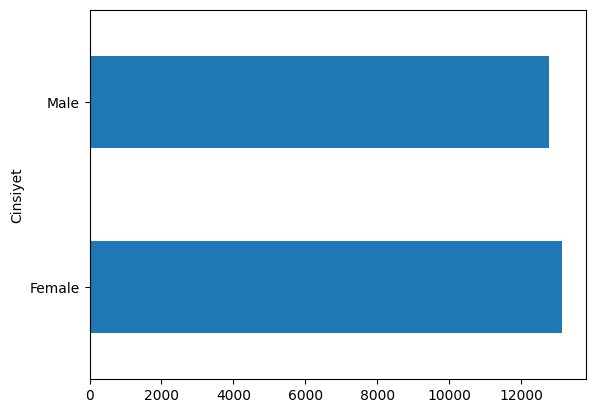

In [9]:
# 'Cinsiyet' sütunundaki değerlerin sayısını hesaplayarak yatay grafikte gösterir.
data.Cinsiyet.value_counts().plot.barh() 

In [10]:
# 'Yas' sütunu değeri 0 olan satırları veri kümesinden çıkarır
data.drop(data[data['Yas'] == 0].index, inplace=True) 

In [11]:
# 'Yas' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Yas.value_counts()  

Yas
39    720
25    711
40    634
41    631
43    625
     ... 
75     15
74     14
78     11
79     10
85      8
Name: count, Length: 75, dtype: int64

<Axes: ylabel='Yas'>

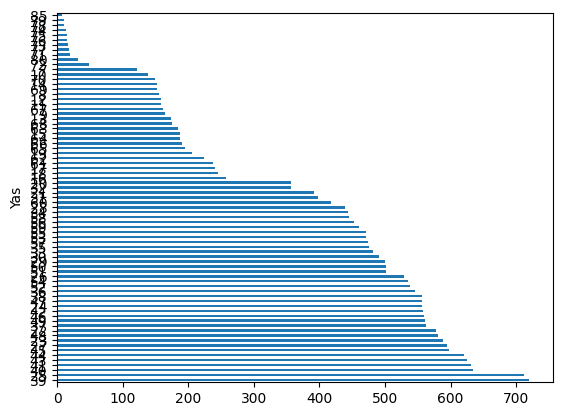

In [12]:
# 'Yas' sütunundaki değerlerin sayısını hesaplayarak yatay grafikte gösterir.
data.Yas.value_counts().plot.barh()

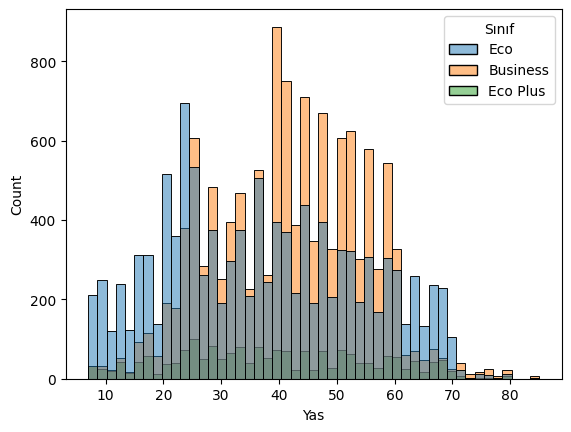

In [13]:
# Seaborn kütüphanesini kullanarak 'Yas' sütununa göre histogram grafiği oluştur.
# Histogramda 'Sınıf' sütununa göre renklendirme yap.
sns.histplot(x=data["Yas"] , hue =data ["Sınıf"])
plt.show()

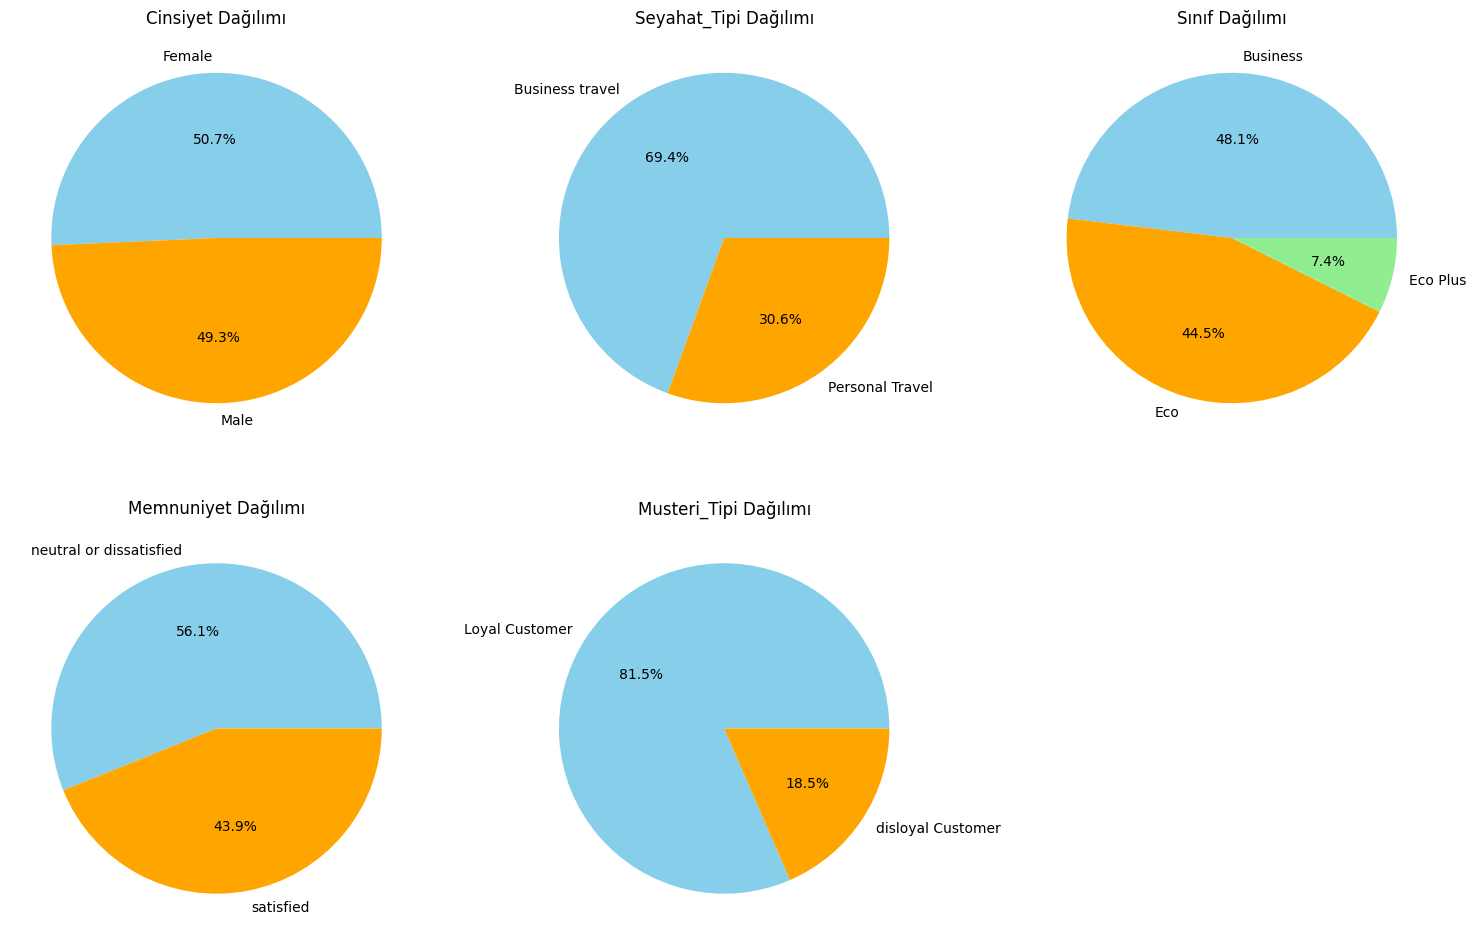

In [14]:
# Dağılım grafikleri oluşturmak için kullanılacak sütunlar.
columns = ['Cinsiyet','Seyahat_Tipi','Sınıf','Memnuniyet','Musteri_Tipi']

# Oluşturulacak grafik sayısı.
num_plots = len(columns)

# Grafikleri yan yana kaç sütunda yerleştirileceği.
num_cols = 3

# Satır sayısını hesapla (tam bölünmeyen durumlar için bir satır daha eklenir).
num_rows = num_plots // num_cols + 1
plt.figure(figsize=(15,10))

# Her sütun için grafik oluştur.
for i ,column in enumerate(columns,1):
    
    # Alt grafiklerin yerleşimini belirle.
    plt.subplot(num_rows,num_cols,i)
    
    # Her sütunun değer dağılımını pasta grafiği olarak çiz.
    data[column].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['skyblue', 'orange', 'lightgreen','lightcoral']) 
    plt.title(f'{column} Dağılımı')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [15]:
# 'Seyahat_Tipi' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Seyahat_Tipi.value_counts() 

Seyahat_Tipi
Business travel    17980
Personal Travel     7913
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_11772\1983168354.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


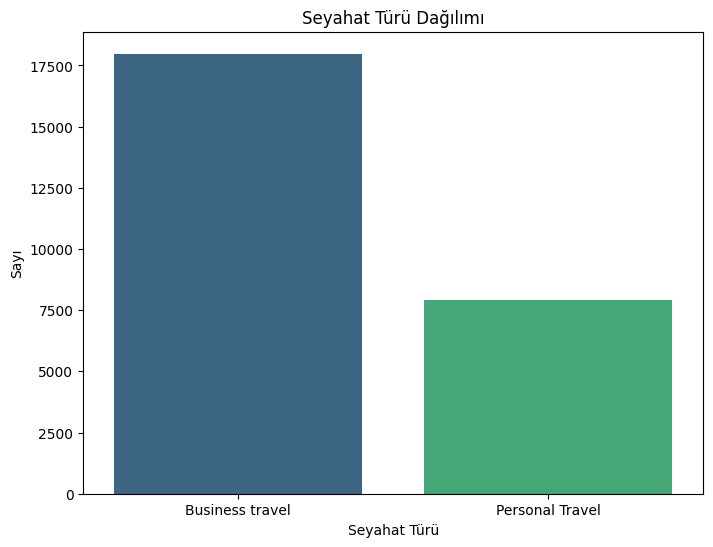

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seyahat_Tipi sütunundaki değerlerin sayılarını al
counts = data['Seyahat_Tipi'].value_counts()

# Figure oluştur
plt.figure(figsize=(8, 6))

# Bar grafiği çiz
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Grafik başlığı ekle
plt.title('Seyahat Türü Dağılımı')

# x ekseni etiketi ekle
plt.xlabel('Seyahat Türü')

# y ekseni etiketi ekle
plt.ylabel('Sayı')

# Grafikleri göster
plt.show()

In [17]:
# 'Cinsiyet' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Cinsiyet.value_counts() 

Cinsiyet
Female    13127
Male      12766
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_11772\3810724140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


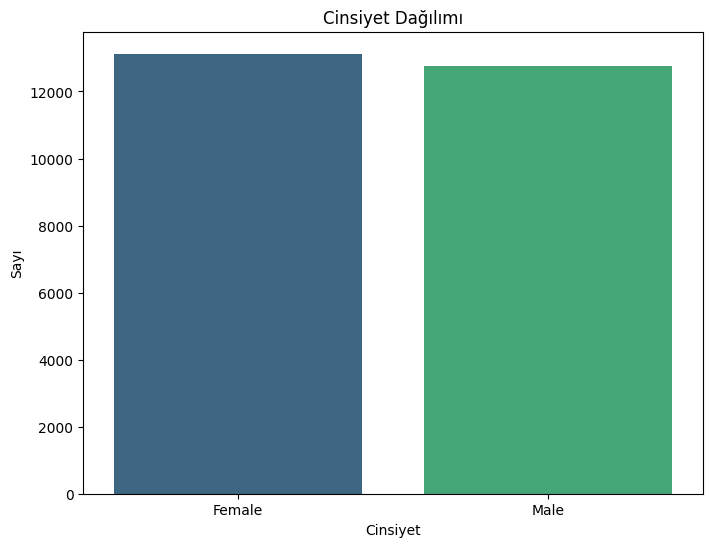

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cinsiyet sütunundaki değerlerin sayılarını al
counts = data['Cinsiyet'].value_counts()

# Figure oluştur
plt.figure(figsize=(8, 6))

# Bar grafiği çiz
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Grafik başlığı ekle
plt.title('Cinsiyet Dağılımı')

# x ekseni etiketi ekle
plt.xlabel('Cinsiyet')

# y ekseni etiketi ekle
plt.ylabel('Sayı')

# Grafikleri göster
plt.show()

In [19]:
# 'Memnuniyet' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Memnuniyet.value_counts() 

Memnuniyet
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_11772\3773079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


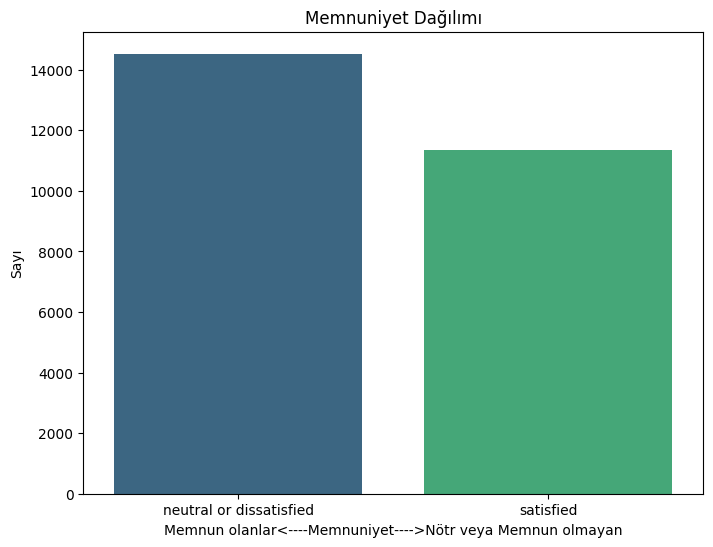

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memnuniyet sütunundaki değerlerin sayılarını al
counts = data['Memnuniyet'].value_counts()

# Figure oluştur
plt.figure(figsize=(8, 6))

# Bar grafiği çiz
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Grafik başlığı ekle
plt.title('Memnuniyet Dağılımı')

# x ekseni etiketi ekle
plt.xlabel('Memnun olanlar<----Memnuniyet---->Nötr veya Memnun olmayan')

# y ekseni etiketi ekle
plt.ylabel('Sayı')

# Grafikleri göster
plt.show()

In [21]:
# 'Musteri_Tipi' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Musteri_Tipi.value_counts() 

Musteri_Tipi
Loyal Customer       21111
disloyal Customer     4782
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_11772\311337052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


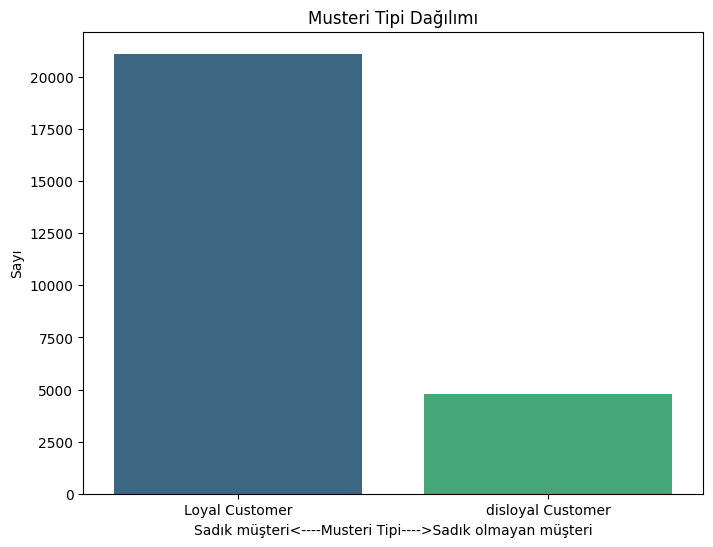

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Musteri_Tipi sütunundaki değerlerin sayılarını al
counts = data['Musteri_Tipi'].value_counts()

# Figure oluştur
plt.figure(figsize=(8, 6))

# Bar grafiği çiz
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Grafik başlığı ekle
plt.title('Musteri Tipi Dağılımı')

# x ekseni etiketi ekle
plt.xlabel('Sadık müşteri<----Musteri Tipi---->Sadık olmayan müşteri')

# y ekseni etiketi ekle
plt.ylabel('Sayı')

# Grafikleri göster
plt.show()

In [23]:
# 'Sınıf' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Sınıf.value_counts() 

Sınıf
Business    12457
Eco         11524
Eco Plus     1912
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_11772\673176578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


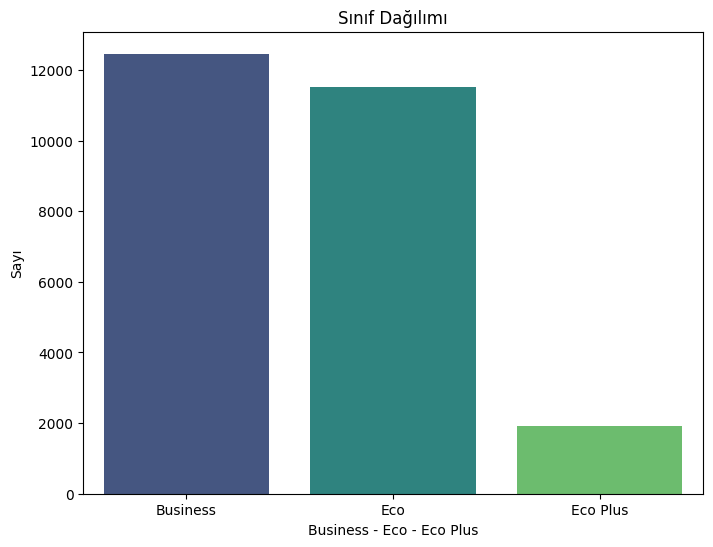

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sınıf sütunundaki değerlerin sayılarını al
counts = data['Sınıf'].value_counts()

# Figure oluştur
plt.figure(figsize=(8, 6))

# Bar grafiği çiz
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Grafik başlığı ekle
plt.title('Sınıf Dağılımı')

# x ekseni etiketi ekle
plt.xlabel('Business - Eco - Eco Plus')

# y ekseni etiketi ekle
plt.ylabel('Sayı')

# Grafikleri göster
plt.show()

In [25]:
# 'Cinsiyet' sütunundaki 'Female' ve 'Male' değerlerini sırasıyla 0 ve 1 olarak eşle.
mapping = {'Female': 0, 'Male': 1} 
data['Cinsiyet'] = data['Cinsiyet'].map(mapping)

# 'Musteri_Tipi' sütunundaki 'Loyal Customer' ve 'disloyal Customer' değerlerini sırasıyla 0 ve 1 olarak eşle.
mapping2 = {'Loyal Customer': 0, 'disloyal Customer': 1} 
data['Musteri_Tipi'] = data['Musteri_Tipi'].map(mapping2)

# 'Seyahat_Tipi' sütunundaki 'Business travel' ve 'Personal Travel' değerlerini sırasıyla 0 ve 1 olarak eşle.
mapping3 = {'Business travel': 0, 'Personal Travel': 1} 
data['Seyahat_Tipi'] = data['Seyahat_Tipi'].map(mapping3)

# 'Sınıf' sütunundaki 'Eco', 'Eco Plus' ve 'Business' değerlerini sırasıyla 0, 1 ve 2 olarak eşle.
mapping4 = {'Eco': 0, 'Eco Plus': 1, 'Business': 2,} 
data['Sınıf'] = data['Sınıf'].map(mapping4)

# 'Memnuniyet' sütunundaki 'satisfied' ve 'neutral or dissatisfied' değerlerini sırasıyla 0 ve 1 olarak eşle.
mapping5 = {'satisfied': 0, 'neutral or dissatisfied': 1} 
data['Memnuniyet'] = data['Memnuniyet'].map(mapping5)

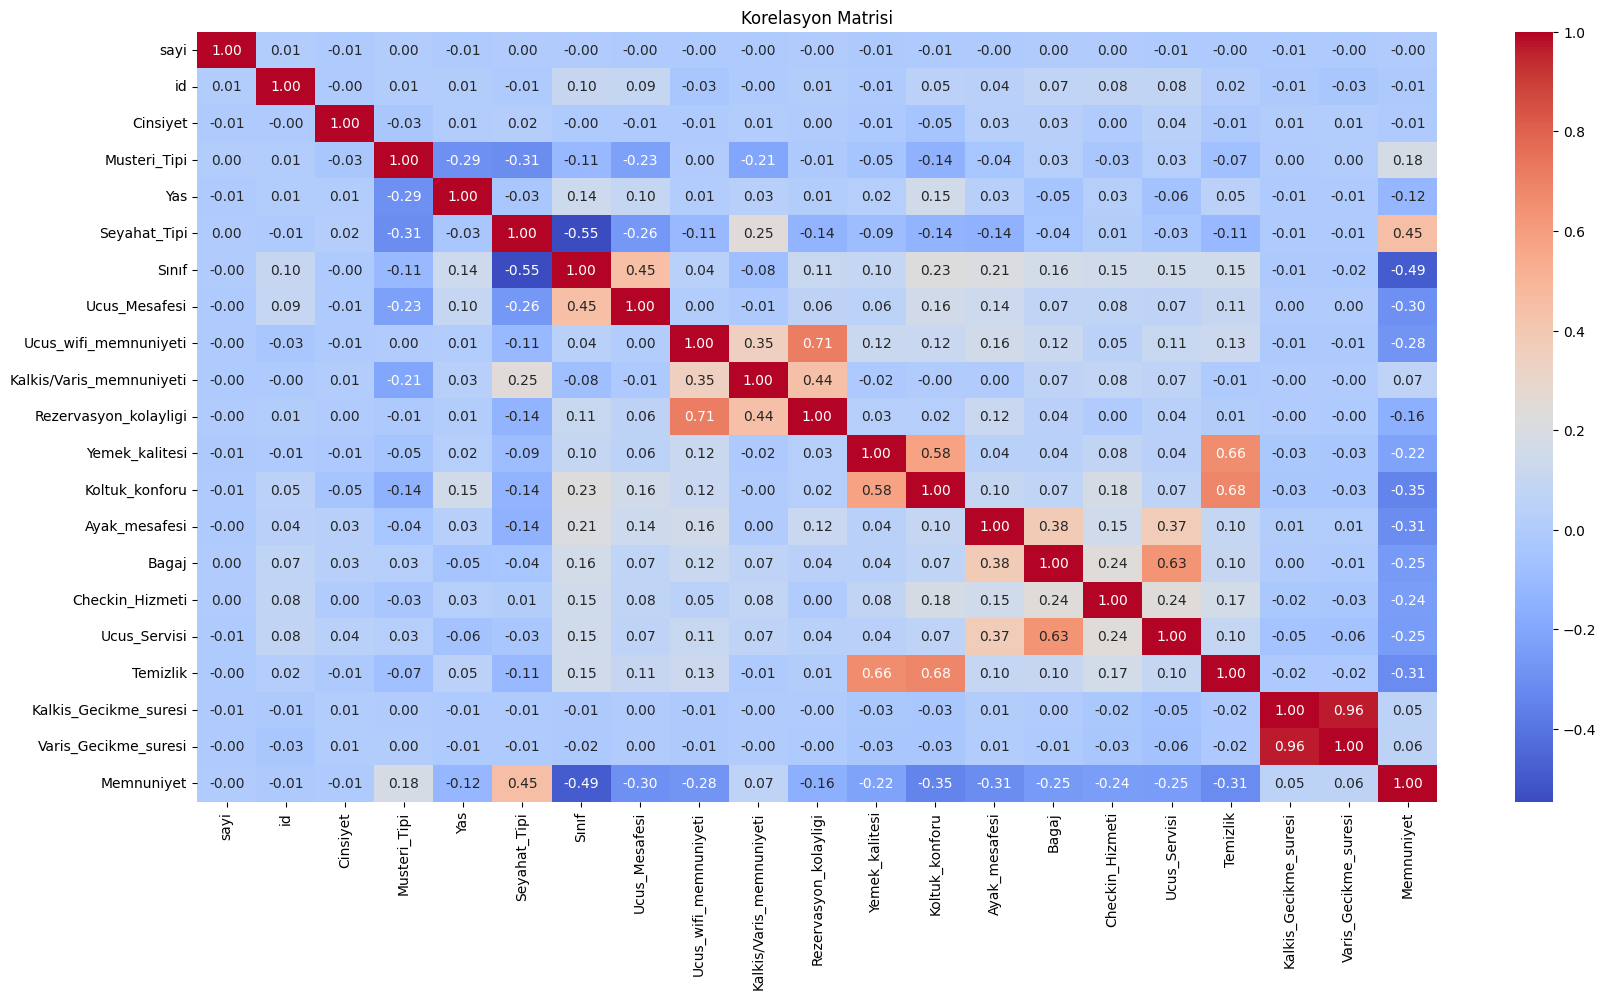

In [26]:
plt.figure(figsize=(20,10))

# Veri çerçevesinin korelasyon matrisini çiz, 'annot=True' ile sayısal değerleri göster.
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [27]:
# RandomForestClassifier'ı kullanmak için gerekli kütüphaneyi içe aktar.
from sklearn.ensemble import RandomForestClassifier

# Veri kümesindeki bağımsız değişkenler (X) ve bağımlı değişken (y) olarak belirle.
x = data[['Sınıf','Musteri_Tipi','Seyahat_Tipi']]
y = data['Memnuniyet']

# Veri kümesini eğitim ve test setlerine ayır.
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# RandomForestClassifier modelini oluştur.
model = RandomForestClassifier()

# Modeli eğitim verileriyle eğit.
model.fit(x_train,y_train)

# Test seti üzerinde tahmin yap.
y_pred = model.predict(x_test)

# Doğruluk skorunu hesapla.
accuracy1 = accuracy_score(y_test,y_pred)

print("Model accuracy: ",accuracy1)


Model accuracy:  0.7752461865224947


In [28]:
# sklearn'den gerekli kütüphaneleri içe aktar.
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier


# Bağımsız ve bağımlı değişkenleri belirle.
x = data[['Sınıf','Musteri_Tipi','Seyahat_Tipi']]
y = data['Memnuniyet']


# Veri kümesini eğitim ve test setlerine ayır.
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


# Karar Ağacı modelini oluştur.
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Karar Ağacı modelini eğit.
decision_tree_model.fit(x_train, y_train)

# k-NN modelini oluştur.
knn_model = KNeighborsClassifier()

# k-NN modelini eğit.
knn_model.fit(x_train, y_train)

# Test seti üzerinde Karar Ağacı ve k-NN modelleriyle tahmin yap.
y_pred_decision_tree = decision_tree_model.predict(x_test) 
y_pred_knn = knn_model.predict(x_test)

# Karar Ağacı modelinin doğruluk puanını hesapla ve yazdır.
accuracy_decision_tree = accuracy_score(y_test,y_pred_decision_tree) 
print("Karar Ağacı Modeli Doğruluk Puanı:", accuracy_decision_tree)

# k-NN modelinin doğruluk puanını hesapla ve yazdır.
accuracy_knn = accuracy_score(y_test,y_pred_knn) 
print("k-NN Modeli Doğruluk Puanı:", accuracy_knn)

Karar Ağacı Modeli Doğruluk Puanı: 0.7752461865224947
k-NN Modeli Doğruluk Puanı: 0.7769839737401043


In [29]:
# sklearn'den gerekli kütüphaneleri içe aktar.
from sklearn.svm import SVC

# Bağımsız ve bağımlı değişkenleri belirle.
x = data[['Sınıf','Musteri_Tipi','Seyahat_Tipi']]
y = data['Memnuniyet']

# Veri kümesini eğitim ve test setlerine ayır.
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# SVM modelini oluştur ve lineer kernel kullanarak tanımla.
svm_model = SVC(kernel='linear', random_state=42)

# SVM modelini eğit.
svm_model.fit(x_train, y_train)

# Test seti üzerinde SVM modeliyle tahmin yap.
y_pred_svm = svm_model.predict(x_test)

# SVM modelinin doğruluk puanını hesapla ve yazdır.
accuracy_svm = accuracy_score(y_test, y_pred_svm) 
print("SVM Modeli Doğruluk Puanı:", accuracy_svm)


SVM Modeli Doğruluk Puanı: 0.7758254489283646


In [30]:
# 'Memnuniyet' sütununu hedef değişken olarak seçme
X = data.drop('Memnuniyet', axis=1)  
y = data['Memnuniyet']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eksik değerleri ortalama ile doldurma
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Dizileri yeniden şekillendirme
y_train = y_train.values.reshape(-1, 1)

# Model oluşturma ve eğitim
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Tahminler
y_pred = model.predict(X_test_imputed)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)           

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7136512840316663
Precision: 0.7183742010119041
Recall: 0.7136512840316663
F1 Score: 0.7145713213785503


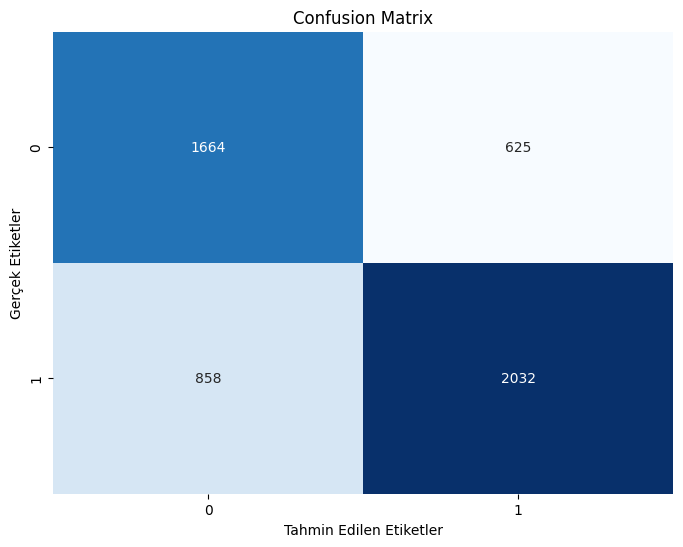

In [31]:
# Confusion Matrix oluşturmak ve görselleştirmek için gerekli kütüphaneleri içe aktar.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Gerçek ve tahmin edilen değerler arasında confusion matrix hesapla.
cm = confusion_matrix(y_test, y_pred)

# Heatmap'in çizim boyutunu belirle.
plt.figure(figsize=(8, 6))

# Seaborn kütüphanesi ile heatmap'i çiz.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Eksen etiketlerini ve başlığı ekle.
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')

# Heatmap'i ekranda göster.
plt.show()


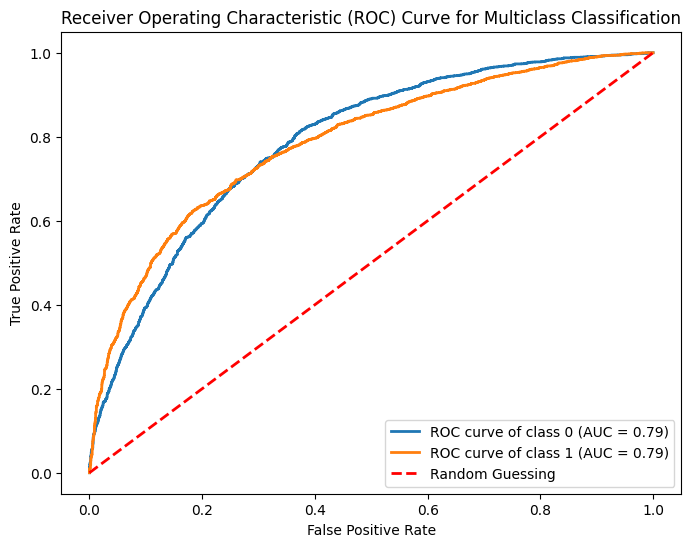

In [32]:
# Tahmin olasılıklarını kullanarak ROC eğrisini çizme
y_prob = model.predict_proba(X_test_imputed)

plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc))


# Rastgele tahmin etme durumunu gösterme
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

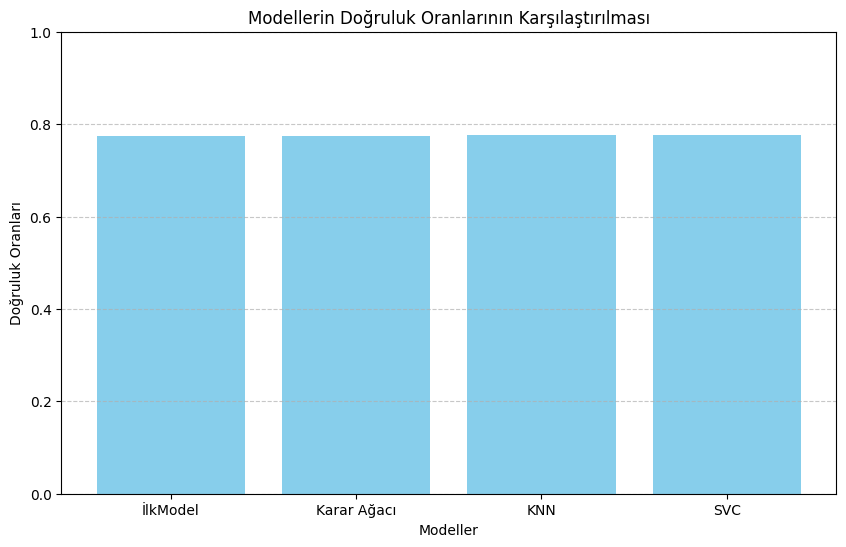

In [33]:
import matplotlib.pyplot as plt
# Modellerin isimleri ve doğruluk oranları 
models = ['İlkModel', 'Karar Ağacı', 'KNN','SVC'] 
accuracies =  [accuracy1,accuracy_decision_tree, accuracy_knn, accuracy_svm] #␣

plt.figure(figsize=(10, 6)) 
plt.bar(models, accuracies, 
color='skyblue') 
plt.xlabel('Modeller') 
plt.ylabel('Doğruluk Oranları')
plt.title('Modellerin Doğruluk Oranlarının Karşılaştırılması')
plt.ylim(0.0, 1.0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()